# Lab #1
## Intro
The purpose of this laboratory is to get you acquainted with Python. More specifically, you will learn how
to read different types of datasets (CSV and JSON). You will read the dataset contents from the filesystem
into the program’s memory, to then perform several operations on the data.

For this lab, three different datasets will be used. Here, you will learn more about them and how to retrieve
them.

## 1. Irıs dataset
### 1.1. Datasets Download
This specific dataset contains information about
the Iris, a genus that includes 260-300 species of plants. The
Iris dataset contains measurements for 150 Iris flowers, each belonging to one of three species: Virginica,
Versicolor and Setosa. (50 flowers for each of the three species). These three species all present similar
flowers
Each of the 150 flowers contained in the Iris dataset is represented by 5 values:

• sepal length, in cm

• sepal width, in cm

• petal length, in cm

• petal width, in cm

• Iris species, one of: Iris-setosa, Iris-versicolor, Iris-virginica

 The dataset
can either be downloaded directly from there (iris.data file), or from a terminal, using the wget tool. The
following command downloads the dataset from the original URL and stores it in a file named iris.csv.

_$ wget "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data" -O iris.csv_


### 1.2. Exercises
**1.** Load the previously downloaded Iris dataset as a list of lists (each of the 150 lists should have 5 elements). You can make use of the csv module

In [3]:
import csv

In [4]:
data = []
with open('iris.csv','r') as f:
    for l in csv.reader(f):
        for i in l:
            try:
                l[l.index(i)] = float(i)
            except:
                pass
        data.append(l)
for i in data:
    if len(i) != 5:
        data.pop(data.index(i))

**2.** Compute and print the mean and the standard deviation for each of the 4 measurement columns
(i.e. sepal length and width, petal length and width).

In [5]:
def meanCalculator(data, column):
    s = 0
    c = 0
    for line in data:
        try:
            if line[column] is not None:
                s += line[column]
                c += 1
        except:
            continue
    return s/c

In [6]:
def stdDevCalculator(data, column):
    mean = meanCalculator(data,column)
    stdev = (sum(map(lambda x: (x-mean)**2,(x[column] for x in [y for y in data])))/len(data))**.5
    return stdev

In [7]:
columns = ['sepal length','sepal width','petal length','petal width','species']
for i in range(4):
    print(f'{columns[i]} mean: {round(meanCalculator(data,i),1)}')
print('----------------------')
for i in range(4):
    print(f"{columns[i]}'s standart deviation: {round(stdDevCalculator(data,i),2)}")

sepal length mean: 5.8
sepal width mean: 3.1
petal length mean: 3.8
petal width mean: 1.2
----------------------
sepal length's standart deviation: 0.83
sepal width's standart deviation: 0.43
petal length's standart deviation: 1.76
petal width's standart deviation: 0.76


**3.** Compute and print the mean and the standard deviation for each of the 4 measurement columns,
separately for each of the three Iris species (versicolor, virginica and setosa).


In [8]:
#first find the unique how unique elements are named in our dataset
species = list(set([x[4] for x in [y for y in data]]))
print(species)
print('****************')
#then filter the datasets
for i in species:
    d = list(filter(lambda x: x[4]==i,data))
    print(f'{i} means are:')
    for j in columns[:4]:
        print(f'{j} mean: {round(meanCalculator(d,columns.index(j)),1)}')
    print('------')
    print(f'{i} standard deviations are:')
    for j in columns[:4]:
        print(f"{j}'s standard deviation: {round(stdDevCalculator(d,columns.index(j)),2)}")
    print("========================================")

['Iris-setosa', 'Iris-virginica', 'Iris-versicolor']
****************
Iris-setosa means are:
sepal length mean: 5.0
sepal width mean: 3.4
petal length mean: 1.5
petal width mean: 0.2
------
Iris-setosa standard deviations are:
sepal length's standard deviation: 0.35
sepal width's standard deviation: 0.38
petal length's standard deviation: 0.17
petal width's standard deviation: 0.11
Iris-virginica means are:
sepal length mean: 6.6
sepal width mean: 3.0
petal length mean: 5.6
petal width mean: 2.0
------
Iris-virginica standard deviations are:
sepal length's standard deviation: 0.63
sepal width's standard deviation: 0.32
petal length's standard deviation: 0.55
petal width's standard deviation: 0.27
Iris-versicolor means are:
sepal length mean: 5.9
sepal width mean: 2.8
petal length mean: 4.3
petal width mean: 1.3
------
Iris-versicolor standard deviations are:
sepal length's standard deviation: 0.51
sepal width's standard deviation: 0.31
petal length's standard deviation: 0.47
petal widt

**4.** (*) Based on the results of exercises 2 and 3, which of the 4 measurements would you considering
as being the most characterizing one for the three species? (In other words, which measurement
would you consider “best”, if you were to guess the Iris species based only on those four values?)


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.stats import norm

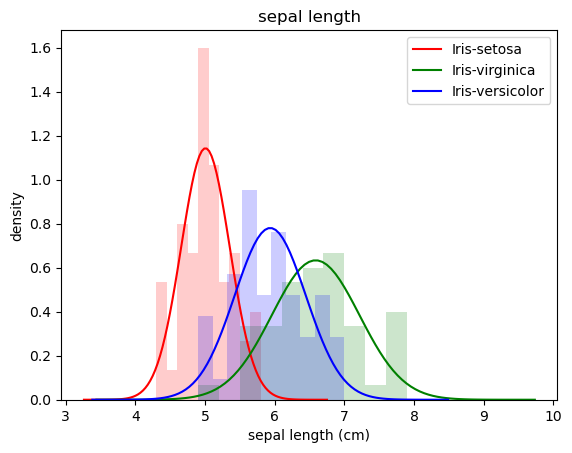

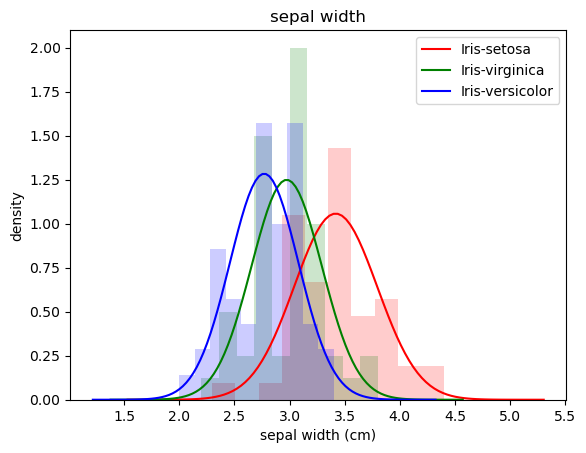

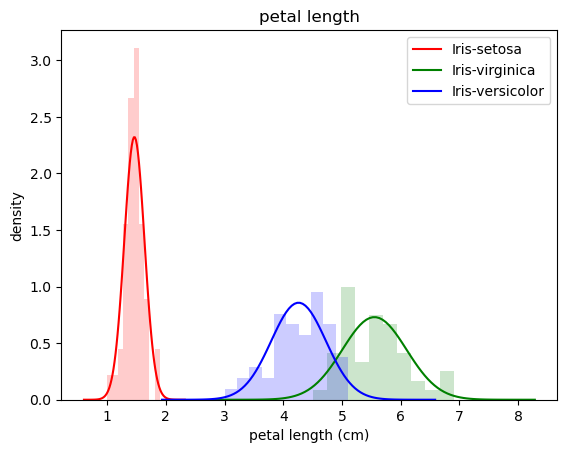

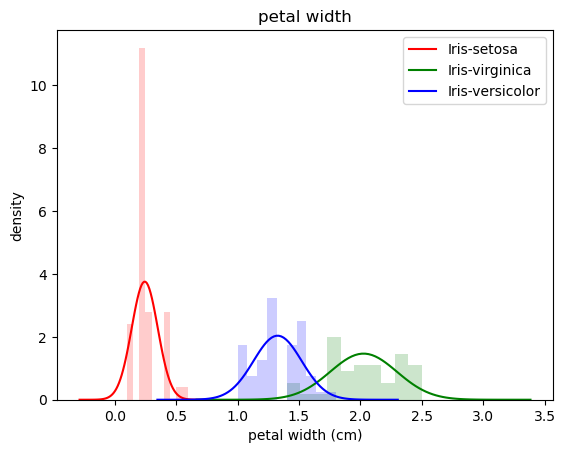

In [10]:
colors = ['r','g','b']
speciesColors = list(zip(species,colors))
for c in columns[:4]:
    plt.figure()
    plt.title(c)
    for spc,color in speciesColors:
        values = list(map(lambda x: x[columns.index(c)], list(filter(lambda x: x[4]==spc, data))))
        plt.hist(values,density=True, alpha=0.2, color = color)
        u = meanCalculator(list(filter(lambda x: x[4]==spc, data)),
                           columns.index(c))
        s = stdDevCalculator(list(filter(lambda x: x[4]==spc, data)),
                             columns.index(c))
        x = np.linspace(u-5*s,u+5*s,100)
        plt.plot(x, norm(u,s).pdf(x), label=spc, color=color, alpha=1)
        plt.xlabel(f'{c} (cm)')
        plt.ylabel('density')
    plt.legend()

In [11]:
print('-Sepal length and width have near-centered distributions whereas Petal length and width have dissociating distributions')
print('-In general, Iris-setosa(green) has less standard deviation. In figures, it can be seen that its values have distributed on small partion of x axis')
print('-Petal measures show better performance to characterize species. Especially, distinguishing Iris-Setosa is easier.')

-Sepal length and width have near-centered distributions whereas Petal length and width have dissociating distributions
-In general, Iris-setosa(green) has less standard deviation. In figures, it can be seen that its values have distributed on small partion of x axis
-Petal measures show better performance to characterize species. Especially, distinguishing Iris-Setosa is easier.


**5.** (*) Based on the considerations of Exercise 3, assign the flowers with the following measurements
to what you consider would be the most likely species.

5.2, 3.1, 4.0, 1.2

4.9, 2.5, 5.6, 2.0

5.4, 3.2, 1.9, 0.4

In [19]:
checklist = {1: [5.2, 3.1, 4.0, 1.2],
             2: [4.9, 2.5, 5.6, 2.0],
             3: [5.4, 3.2, 1.9, 0.4]}
species = list(set(map(lambda x: x[4],data)))

In [55]:
d = {}
for number, item in checklist.items():
    d[number] = {}
    for s in species:
        dset = list(filter(lambda x: x[4]==s, data))
        summation = 0
        for line in dset:
            summation = (line[0]-item[0])**2+(line[1]-item[1])**2+(line[2]-item[2])**2+(line[3]-item[3])**2
        d[number][s] = summation**.5
for n,v in d.items():
    minValue = min(d[n].values())
    key = [i for i in d[n] if d[n][i]==minValue]
    print(f"Mostly likely species for sample {n} is {key[0]}.")

Mostly likely species for sample 1 is Iris-versicolor.
Mostly likely species for sample 2 is Iris-virginica.
Mostly likely species for sample 3 is Iris-setosa.
